In [1]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("fiat500.csv")

In [3]:
data

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [4]:
data.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [5]:
data.tail()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
1533,1534,sport,51,3712,115280,1,45.069679,7.70492,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.66687,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.41348,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.68227,5990
1537,1538,pop,51,1766,54276,1,40.323410,17.56827,7900


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [7]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [8]:
data.isna().sum()

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [9]:
data.shape

(1538, 9)

In [10]:
data.columns

Index(['ID', 'model', 'engine_power', 'age_in_days', 'km', 'previous_owners',
       'lat', 'lon', 'price'],
      dtype='object')

In [11]:
data1=data.drop(['ID','lat','lon'],axis=1)
data1

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [12]:
data1["model"].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [13]:
data1["price"]==5200

0       False
1       False
2       False
3       False
4       False
        ...  
1533     True
1534    False
1535    False
1536    False
1537    False
Name: price, Length: 1538, dtype: bool

In [14]:
data1[data1["price"]==5200]

,model,engine_power,age_in_days,km,previous_owners,price
33,sport,51,3927,140000,2,5200
329,lounge,51,3835,100000,1,5200
350,lounge,51,4108,138000,1,5200
636,sport,51,4353,119000,1,5200
899,lounge,51,3835,100000,1,5200
1170,lounge,51,3835,124000,1,5200
1533,sport,51,3712,115280,1,5200


In [15]:
data1["model"]

0       lounge
1          pop
2        sport
3       lounge
4          pop
         ...  
1533     sport
1534    lounge
1535       pop
1536    lounge
1537       pop
Name: model, Length: 1538, dtype: object

In [16]:
new_data = pd.get_dummies(data1,dtype=int)

In [17]:
new_data

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [18]:
cor_data=new_data.corr()

In [19]:
cor_data

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235,-0.133321,0.024783,0.217362
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328,-0.259863,0.108327,0.313276
km,0.285495,0.833890,1.000000,0.097539,-0.859373,-0.255746,0.109024,0.303874
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274,-0.024643,-0.019316,0.084129
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000,0.302299,-0.167190,-0.288706
model_lounge,-0.133321,-0.259863,-0.255746,-0.024643,0.302299,1.000000,-0.864605,-0.382017
model_pop,0.024783,0.108327,0.109024,-0.019316,-0.167190,-0.864605,1.000000,-0.134050
model_sport,0.217362,0.313276,0.303874,0.084129,-0.288706,-0.382017,-0.134050,1.000000


<Axes: >

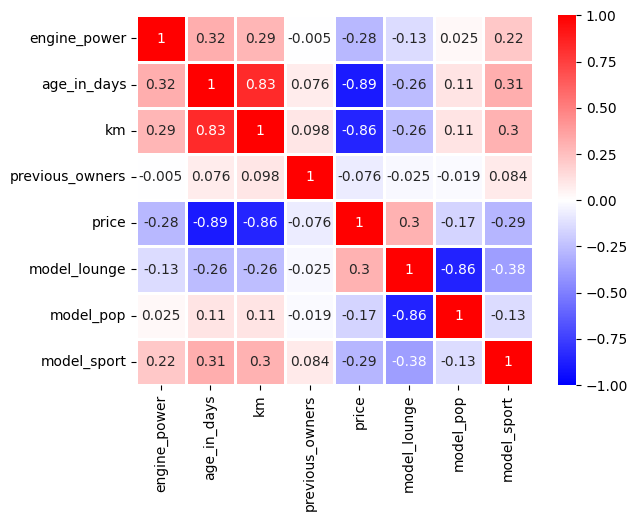

In [20]:
sb.heatmap(cor_data,vmax=1,vmin=-1,annot=True,linewidth=.8,cmap='bwr')

In [21]:
y=new_data["price"]
X=new_data.drop(["price"],axis=1)

In [22]:
y.shape

(1538,)

In [23]:
X.shape

(1538, 7)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [26]:
X_train.shape

(1153, 7)

In [27]:
X_test.shape

(385, 7)

In [28]:
y_train

1306     9700
680     10950
1450     9970
671      7990
1396    10200
        ...  
580      5300
163      9000
607      9970
414      9980
971     10900
Name: price, Length: 1153, dtype: int64

**Linear regression**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lg=LinearRegression()
lg

LinearRegression()

In [31]:
lg.fit(X_train,y_train)

LinearRegression()

In [32]:
y_predict=lg.predict(X_test)

In [33]:
y_predict

array([ 6359.00058278,  7011.19047569,  7342.21983083,  9925.58180732,
        9872.05323346, 10413.39492495, 10102.05392991,  6219.89760143,
        5717.14224706,  9318.65644483,  9999.52149732,  9766.31126179,
        5333.55241489,  5652.05209789,  4722.55687948,  7151.72639088,
       10269.67532222,  6389.79019479,  9838.74098385, 10326.01984524,
        6496.66114974, 10440.28321881,  8845.00250987,  5572.94519111,
        5917.03870602,  5742.13050355,  9865.97599042,  9833.46940829,
       10405.34953951,  9181.58699742,  8738.17388397,  8859.14976319,
        9884.94486004,  9911.95097318,  9962.1920631 , 10587.95081805,
        6282.47112579,  6143.66023762,  5500.75266767,  6078.90331171,
        9600.40437031,  9830.35233877, 10066.89338573,  9779.97583173,
        8856.93137639,  6369.32916905, 10355.64142249,  9991.43565328,
        9580.1634771 ,  9800.28131317, 10042.62611582, 10356.05447967,
       10131.25848601,  7937.86671795,  8510.21352102, 10370.26442059,
      

In [34]:
from sklearn.metrics import r2_score,mean_squared_error

In [35]:
r2_score(y_predict,y_test)

0.8245606603829363

In [36]:
mean_squared_error(y_predict,y_test)

564401.9125399663

**Polynomial regression**

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pf=PolynomialFeatures(degree=3)

In [39]:
Xpoly=pf.fit_transform(X)

In [40]:
Xpoly

array([[1.000e+00, 5.100e+01, 8.820e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 5.100e+01, 1.186e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 7.400e+01, 4.658e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 5.100e+01, 2.223e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 5.100e+01, 2.557e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 5.100e+01, 1.766e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train1,X_test1,y_train1,y_test1=train_test_split(Xpoly,y,test_size=0.25,random_state=47)

In [43]:
X_train1.shape

(1153, 120)

In [44]:
X_test1.shape

(385, 120)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lg1=LinearRegression()

In [47]:
lg1.fit(X_train1,y_train1)

LinearRegression()

In [48]:
y_predict1=lg1.predict(X_test1)

In [49]:
y_predict1

array([ 8968.67531639, 10113.76193758,  7635.91726413, 10138.26547948,
        8552.06972821,  5534.3291024 , 10344.7771961 ,  6621.49361062,
        9820.90495178,  9767.06049684,  8823.28292744,  9867.27376134,
        9762.26017422,  9357.67129319,  5374.5440666 , 10441.23305468,
        5738.05726779,  5221.00857344,  6227.40254645,  9814.19756438,
        9858.73215976,  5492.84437472,  7339.72377446,  9251.01397919,
       10446.00361344, 10709.02857245,  9388.33840861, 10182.55474274,
        6230.43006474, 10455.01469791,  5415.51692324,  9905.70741764,
       10190.4480156 ,  8441.31876975,  7041.1112577 ,  7253.72191908,
        9783.8914076 ,  4894.26651545,  8571.97625861,  6443.20592823,
        9871.75998326,  9701.87355327,  5264.20698789, 10353.6855915 ,
       10257.65201138,  5580.33046393,  4771.83487852,  8541.28656819,
        6291.39480178,  6792.11547549,  8940.84130477,  7935.86389132,
        6254.70763004,  9623.18569456,  6802.75059182, 10166.76867708,
      

In [50]:
from sklearn.metrics import r2_score,mean_squared_error

In [51]:
r2_score(y_predict1,y_test1)

0.7996842577719182

**Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dt=DecisionTreeRegressor(random_state=47)
dt

DecisionTreeRegressor(random_state=47)

In [54]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=47)

In [55]:
y_predict_2=dt.predict(X_test)

In [56]:
y_predict_2

array([ 5500.        ,  7800.        ,  6900.        , 10900.        ,
       10640.        , 10500.        , 10990.        ,  5199.        ,
        4800.        ,  8800.        , 10399.        ,  9000.        ,
        3900.        ,  4700.        ,  5500.        ,  7800.        ,
       10500.        ,  5900.        ,  9400.        , 10500.        ,
        5900.        , 10500.        ,  8500.        ,  5500.        ,
        5500.        ,  4900.        , 10480.        ,  9400.        ,
        9100.        ,  8500.        ,  8900.        , 10900.        ,
        8900.        ,  9700.        ,  9600.        , 11000.        ,
        6000.        ,  5950.        ,  5500.        ,  5990.        ,
       10800.        ,  9400.        , 10800.        , 10400.        ,
        8979.83333333,  5699.        , 11000.        , 10900.        ,
        9500.        ,  8500.        , 10900.        , 10900.        ,
        9900.        ,  7500.        ,  6900.        , 10690.        ,
      

In [57]:
from sklearn.metrics import r2_score,mean_squared_error

In [58]:
r2_score(y_predict_2,y_test)

0.7349948898827683

**Random Forest**

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf=RandomForestRegressor(n_estimators=8,random_state=0)
rf

RandomForestRegressor(n_estimators=8, random_state=0)

In [61]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=8, random_state=0)

In [62]:
y_predict3=rf.predict(X_test)

In [63]:
y_predict3

array([ 5937.5       ,  6806.25      ,  6887.5       , 10501.25      ,
       10426.25      , 10260.        , 10098.5       ,  5284.75      ,
        5862.5       ,  9103.75      , 10544.5       ,  9596.25      ,
        5423.75      ,  5186.25      ,  5575.        ,  7461.25      ,
        9946.25      ,  5587.5       ,  9287.5       , 10500.        ,
        5986.25      , 10352.375     ,  9495.        ,  4785.875     ,
        5937.5       ,  6323.625     , 10485.625     ,  9412.5       ,
        9410.        ,  9022.        ,  8244.875     ,  9033.75      ,
        9125.        ,  9625.        ,  9600.        , 10550.        ,
        6200.        ,  6093.75      ,  5762.5       ,  5971.125     ,
       10236.25      ,  9412.5       , 10537.5       , 10156.25      ,
        8979.79166667,  5761.75      , 10831.25      , 10317.5       ,
        9562.5       ,  9500.        , 10761.25      , 10600.        ,
       10208.75      ,  7493.75      ,  8008.75      , 10496.25      ,
      

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
r2_score(y_predict3,y_test)

0.8027985552464447

In [66]:
df=pd.DataFrame(columns=['Actual_Price','Predicted_Price'])
df

,Actual_Price,Predicted_Price


In [67]:
df["Actual_Price"]=y_test
df["Predicted_Price"]=y_predict
df

,Actual_Price,Predicted_Price
374,6600,6359.000583
953,8800,7011.190476
151,7900,7342.219831
1224,10990,9925.581807
681,10250,9872.053233
...,...,...
990,8800,9520.426569
1409,9700,10039.484396
170,5900,6813.475781
350,5200,5027.861312


In [68]:
df['ID']=df.index
df

,Actual_Price,Predicted_Price,ID
374,6600,6359.000583,374
953,8800,7011.190476,953
151,7900,7342.219831,151
1224,10990,9925.581807,1224
681,10250,9872.053233,681
...,...,...,...
990,8800,9520.426569,990
1409,9700,10039.484396,1409
170,5900,6813.475781,170
350,5200,5027.861312,350


[]

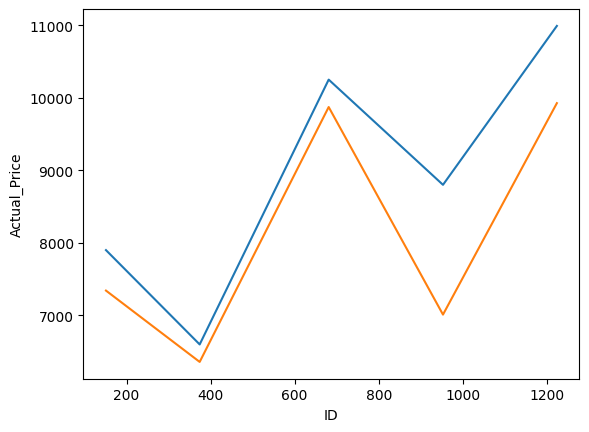

In [69]:
sb.lineplot(x='ID',y='Actual_Price',data=df.head())
sb.lineplot(x='ID',y='Predicted_Price',data=df.head())
plt.plot()

In [70]:
import joblib

In [71]:
joblib.dump(lg,"car_price_model.pkl")

['car_price_model.pkl']

In [76]:
x=[[51,900,60000,1,1,0,0]]

In [77]:
lg.predict(x)

array([9186.50789081])